#### Cai 2022 PBMC abridged QC

**Objective**: Run QC steps without normalisation/UMAP for Cai 2022 PBMC data

**Developed by**: Mairi McClean

**Affiliation**: Institute of Computational Biology, Helmholtz Zentrum Munich

**v230306**

### Load required modules

In [1]:
import anndata
import logging
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sb
import scrublet as scr
import pybiomart as biomart
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import rcParams

In [2]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 160, color_map = 'RdPu', dpi_save = 180, vector_friendly = True, format = 'svg')

-----
anndata     0.8.0
scanpy      1.9.2
-----
PIL                 8.2.0
anyio               NA
appnope             0.1.3
arrow               1.2.3
asttokens           NA
attr                22.2.0
babel               2.12.1
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
brotli              NA
certifi             2022.12.07
cffi                1.15.1
charset_normalizer  2.1.1
colorama            0.4.6
comm                0.1.2
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.6
decorator           5.1.1
executing           1.2.0
fastjsonschema      NA
fqdn                NA
future              0.18.3
h5py                3.8.0
hypergeom_ufunc     NA
idna                3.4
igraph              0.10.4
ipykernel           6.21.2
ipython_genutils    0.2.0
isoduration         NA
jedi                0.18.2
jinja2              3.1.2
joblib              1.2.0
json5               NA
jsonpointer         2.3
jsonschema    

### Read datasets

In [3]:
# adata = sc.read_h5ad('/lustre/groups/talaveralopez/datasets/tuberculosis/rna-seq/mairi_data_lake/INBOX/sc_downloads/cai_2022_PBMC_PFMC/CaiY2022_TB.raw.h5ad')
# adata

In [4]:
# file path when using ext HD
# adata = sc.read_h5ad('/Volumes/LaCie/data_lake/Mairi_example/INBOX/sc_downloads/cai_2022_PBMC_PFMC/CaiY2022_TB.raw.h5ad')
# adata

In [5]:
# file path for local machine

adata = sc.read_h5ad('/Users/mairi.mcclean/data/tb_cc/raw_data_objects/human/tb_pbmc_datasets/CaiY2022_TB.raw.h5ad')
adata

AnnData object with n_obs × n_vars = 223089 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'data_type', 'centre', 'version', 'object', 'protocol'
    var: 'gene_name'

In [6]:
adata.var

,gene_name
gene_id,
ENSG00000223972.5,DDX11L1
ENSG00000227232.5,WASH7P
ENSG00000278267.1,MIR6859-1
ENSG00000243485.5,MIR1302-2HG
ENSG00000284332.1,MIR1302-2
...,...
ENSG00000198695.2,MT-ND6
ENSG00000210194.1,MT-TE
ENSG00000198727.2,MT-CYB


In [7]:
adata.obs

,study,individual,sample,tissue,donor,data_type,centre,version,object,protocol
barcode,,,,,,,,,,
AAACCTGAGAGGTTAT-HRS180101-pbmc_scRNAseq,CaiY_2022,HRI111687,HRS180101,PBMC,P5,scRNAseq,Shenzhen University,10XV2,HRS180101,pbmc_scRNAseq
AAACCTGAGGCGTACA-HRS180101-pbmc_scRNAseq,CaiY_2022,HRI111687,HRS180101,PBMC,P5,scRNAseq,Shenzhen University,10XV2,HRS180101,pbmc_scRNAseq
AAACCTGAGGGTCGAT-HRS180101-pbmc_scRNAseq,CaiY_2022,HRI111687,HRS180101,PBMC,P5,scRNAseq,Shenzhen University,10XV2,HRS180101,pbmc_scRNAseq
AAACCTGAGGTGGGTT-HRS180101-pbmc_scRNAseq,CaiY_2022,HRI111687,HRS180101,PBMC,P5,scRNAseq,Shenzhen University,10XV2,HRS180101,pbmc_scRNAseq
AAACCTGAGGTGTGGT-HRS180101-pbmc_scRNAseq,CaiY_2022,HRI111687,HRS180101,PBMC,P5,scRNAseq,Shenzhen University,10XV2,HRS180101,pbmc_scRNAseq
...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCGCCTGTT-HRS100514-pfmc_scTCRseq,CaiY_2022,HRI068293,HRS100514,PFMC,P4,scTCRseq,Shenzhen University,10XV2,HRS100514,pfmc_scTCRseq
TTTGTCATCTAACTCT-HRS100514-pfmc_scTCRseq,CaiY_2022,HRI068293,HRS100514,PFMC,P4,scTCRseq,Shenzhen University,10XV2,HRS100514,pfmc_scTCRseq
TTTGTCATCTCGTTTA-HRS100514-pfmc_scTCRseq,CaiY_2022,HRI068293,HRS100514,PFMC,P4,scTCRseq,Shenzhen University,10XV2,HRS100514,pfmc_scTCRseq


### Remove scTCRseq and PFMC data

##### Code from https://scanpy.discourse.group/t/filter-out-specific-clusters-using-their-cluster-number/82

EXAMPLE: "adata_new = adata[~adata.obs['data_type'].isin(['scTCRseq']),:]"

In [8]:
adata.obs['data_type'].value_counts()

scRNAseq    146168
scTCRseq     76921
Name: data_type, dtype: int64

In [9]:
adata_new = adata[~adata.obs['data_type'].isin(['scTCRseq']),:]
adata_new

View of AnnData object with n_obs × n_vars = 146168 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'data_type', 'centre', 'version', 'object', 'protocol'
    var: 'gene_name'

In [10]:
adata_new.obs['data_type'].value_counts()

scRNAseq    146168
Name: data_type, dtype: int64

In [11]:
adata_new.obs['tissue'].value_counts()

PBMC    77899
PFMC    68269
Name: tissue, dtype: int64

In [12]:
adata_new_2 = adata_new[~adata_new.obs['tissue'].isin(['PFMC']),:]
adata_new_2

View of AnnData object with n_obs × n_vars = 77899 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'data_type', 'centre', 'version', 'object', 'protocol'
    var: 'gene_name'

In [13]:
adata_new_2.obs['tissue'].value_counts()

PBMC    77899
Name: tissue, dtype: int64

### Make names unique

In [14]:
adata_new_2.var_names_make_unique()
sample_object = adata_new_2.copy()
sample_object

AnnData object with n_obs × n_vars = 77899 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'data_type', 'centre', 'version', 'object', 'protocol'
    var: 'gene_name'

### Replace gene symbols 

In [15]:
sample_object.var['gene_id'] = sample_object.var.index.copy()
sample_object.var.set_index('gene_name', inplace = True)
sample_object.var.head()

,gene_id
gene_name,
DDX11L1,ENSG00000223972.5
WASH7P,ENSG00000227232.5
MIR6859-1,ENSG00000278267.1
MIR1302-2HG,ENSG00000243485.5
MIR1302-2,ENSG00000284332.1


In [16]:
sample_object.var_names = [str(i) for i in sample_object.var_names]
sample_object.var_names_make_unique()


/Users/mairi.mcclean/mambaforge/envs/scanpy_local/lib/python3.9/site-packages/anndata/utils.py:111: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


In [17]:
sample_object.obs

,study,individual,sample,tissue,donor,data_type,centre,version,object,protocol
barcode,,,,,,,,,,
AAACCTGAGAGGTTAT-HRS180101-pbmc_scRNAseq,CaiY_2022,HRI111687,HRS180101,PBMC,P5,scRNAseq,Shenzhen University,10XV2,HRS180101,pbmc_scRNAseq
AAACCTGAGGCGTACA-HRS180101-pbmc_scRNAseq,CaiY_2022,HRI111687,HRS180101,PBMC,P5,scRNAseq,Shenzhen University,10XV2,HRS180101,pbmc_scRNAseq
AAACCTGAGGGTCGAT-HRS180101-pbmc_scRNAseq,CaiY_2022,HRI111687,HRS180101,PBMC,P5,scRNAseq,Shenzhen University,10XV2,HRS180101,pbmc_scRNAseq
AAACCTGAGGTGGGTT-HRS180101-pbmc_scRNAseq,CaiY_2022,HRI111687,HRS180101,PBMC,P5,scRNAseq,Shenzhen University,10XV2,HRS180101,pbmc_scRNAseq
AAACCTGAGGTGTGGT-HRS180101-pbmc_scRNAseq,CaiY_2022,HRI111687,HRS180101,PBMC,P5,scRNAseq,Shenzhen University,10XV2,HRS180101,pbmc_scRNAseq
...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTTGTGGCC-HRS100513-pbmc_scRNAseq,CaiY_2022,HRI068293,HRS100513,PBMC,P4,scRNAseq,Shenzhen University,10XV2,HRS100513,pbmc_scRNAseq
TTTGTCATCAGCTCGG-HRS100513-pbmc_scRNAseq,CaiY_2022,HRI068293,HRS100513,PBMC,P4,scRNAseq,Shenzhen University,10XV2,HRS100513,pbmc_scRNAseq
TTTGTCATCGAATGGG-HRS100513-pbmc_scRNAseq,CaiY_2022,HRI068293,HRS100513,PBMC,P4,scRNAseq,Shenzhen University,10XV2,HRS100513,pbmc_scRNAseq


### Inital scatterplot of top 20

normalizing counts per cell


/Users/mairi.mcclean/mambaforge/envs/scanpy_local/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


    finished (0:00:00)


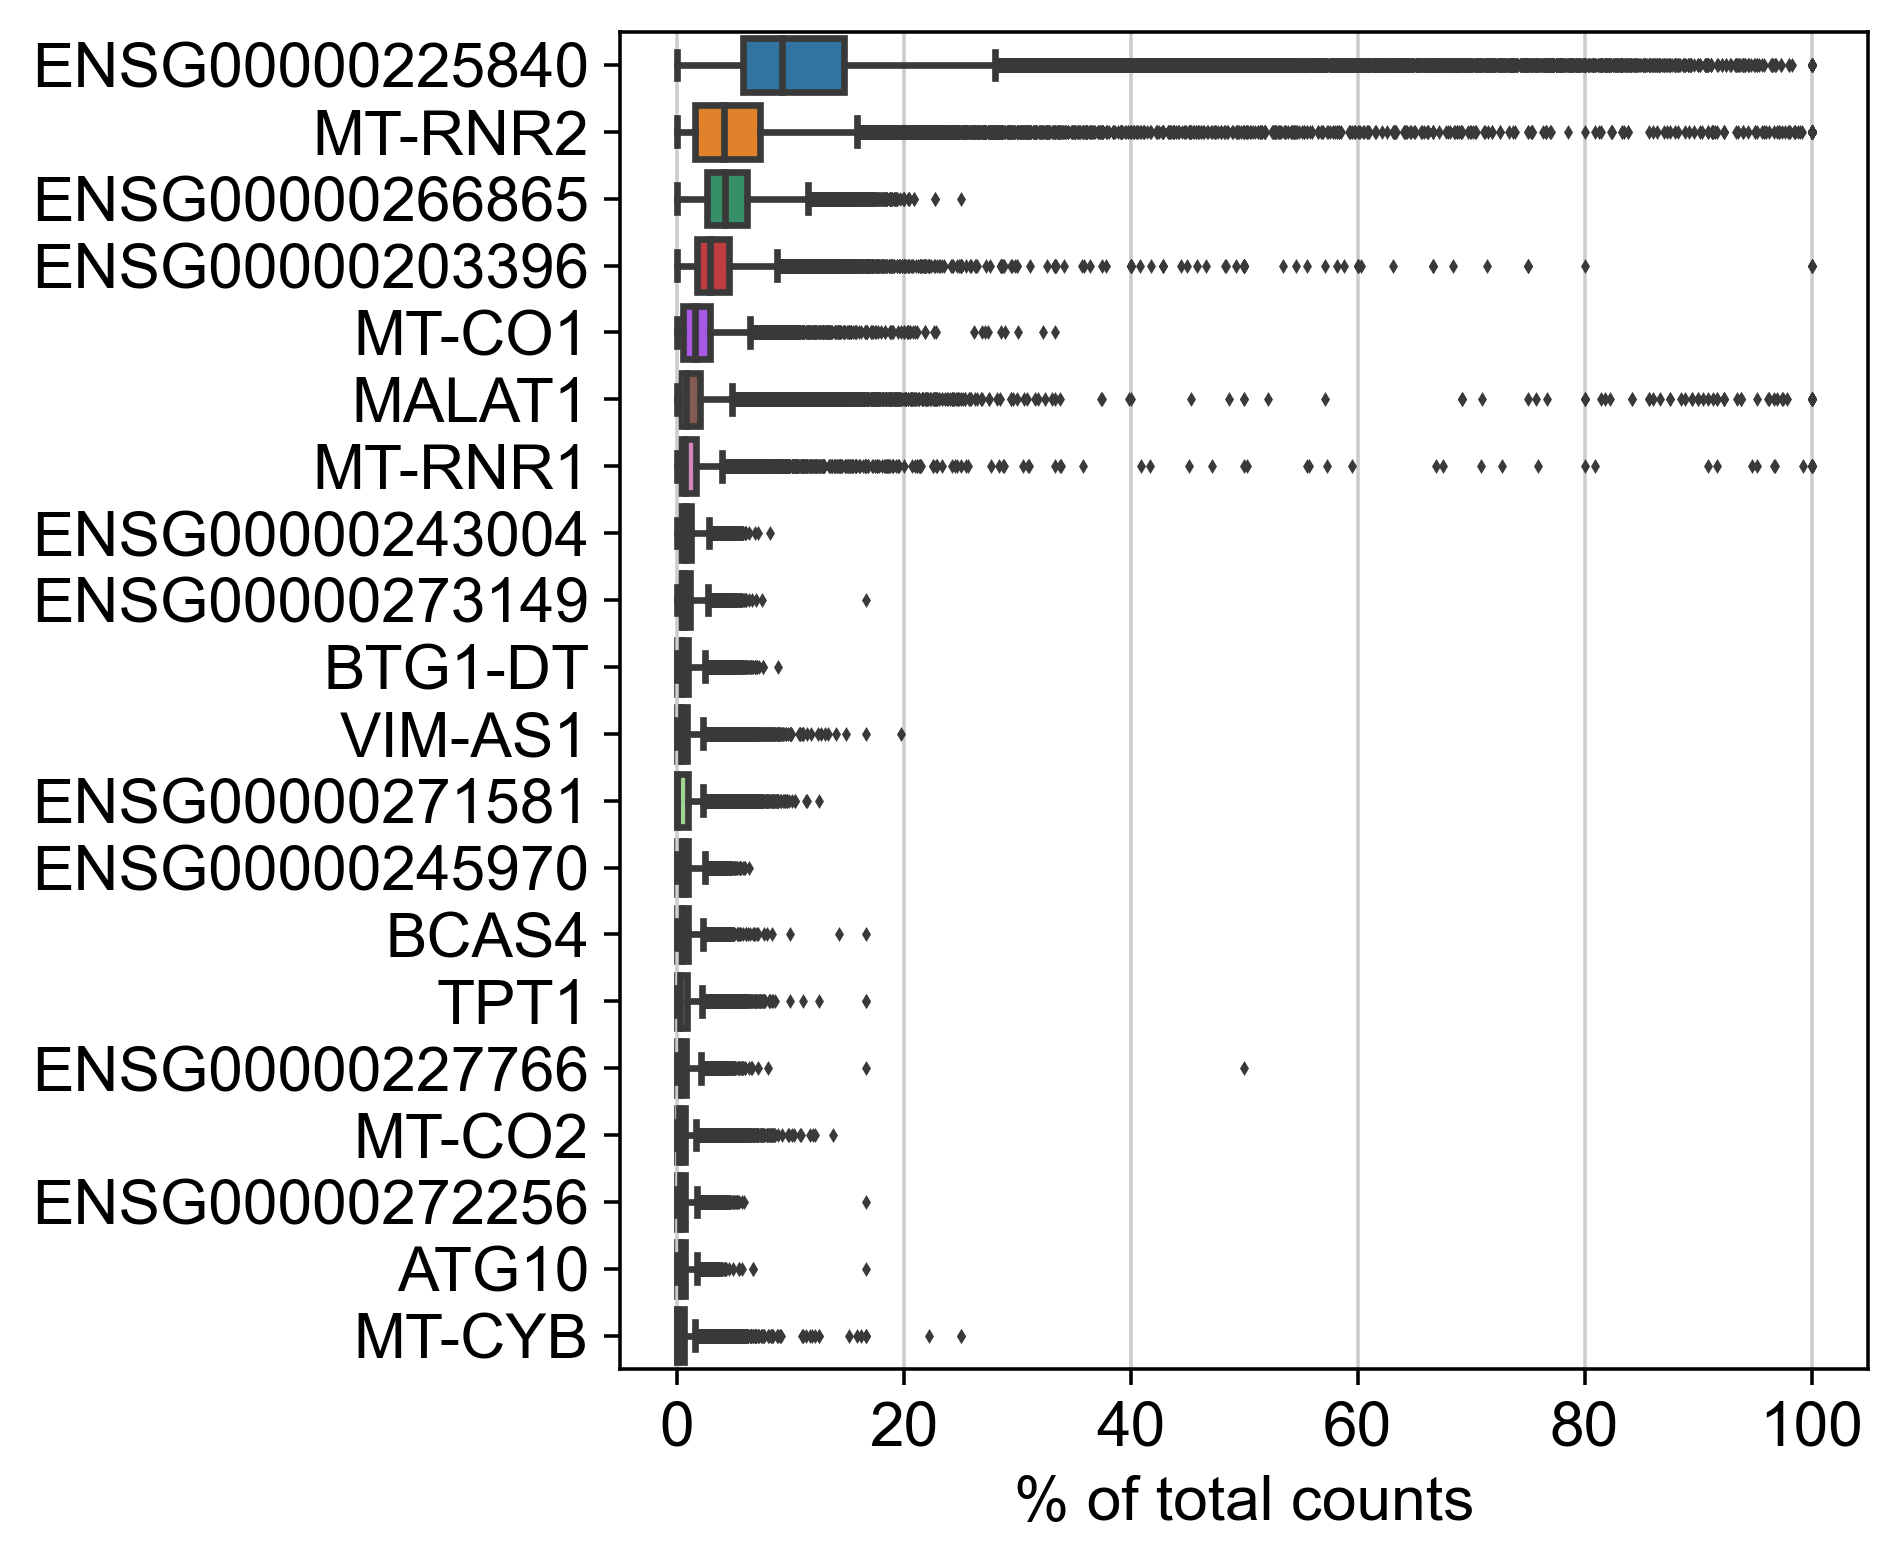

In [18]:
# highest fraction of counts per cell

sc.pl.highest_expr_genes(sample_object, n_top=20)

### Filter cells with >200 genes

In [19]:
sc.pp.filter_cells(sample_object, min_genes = 200)
print(sample_object.n_obs, sample_object.n_vars)

filtered out 52482 cells that have less than 200 genes expressed
25417 61533


In [20]:
sample_object.shape

(25417, 61533)

In [21]:
sample_object.var

,gene_id
DDX11L1,ENSG00000223972.5
WASH7P,ENSG00000227232.5
MIR6859-1,ENSG00000278267.1
MIR1302-2HG,ENSG00000243485.5
MIR1302-2,ENSG00000284332.1
...,...
MT-ND6,ENSG00000198695.2
MT-TE,ENSG00000210194.1
MT-CYB,ENSG00000198727.2
MT-TT,ENSG00000210195.2


### QC metrics

In [22]:
sample_object.shape

(25417, 61533)

In [23]:
sample_object.var['mt'] = sample_object.var_names.str.startswith('MT-')
sample_object.var['ribo'] = sample_object.var_names.str.startswith(("RPS","RPL"))
sample_object.var

,gene_id,mt,ribo
DDX11L1,ENSG00000223972.5,False,False
WASH7P,ENSG00000227232.5,False,False
MIR6859-1,ENSG00000278267.1,False,False
MIR1302-2HG,ENSG00000243485.5,False,False
MIR1302-2,ENSG00000284332.1,False,False
...,...,...,...
MT-ND6,ENSG00000198695.2,True,False
MT-TE,ENSG00000210194.1,True,False
MT-CYB,ENSG00000198727.2,True,False
MT-TT,ENSG00000210195.2,True,False


In [24]:
sc.pp.calculate_qc_metrics(sample_object, qc_vars = ['mt', 'ribo'], percent_top = None, log1p = False, inplace = True)

In [25]:
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
# add the total counts per cell as observations-annotation to adata

mito_genes = sample_object.var_names.str.startswith('MT-')
sample_object.obs['percent_mt2'] = np.sum(
    sample_object[:, mito_genes].X, axis = 1).A1 / np.sum(sample_object.X, axis = 1).A1
sample_object.obs['n_counts'] = sample_object.X.sum(axis = 1).A1

In [26]:
sample_object

AnnData object with n_obs × n_vars = 25417 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'data_type', 'centre', 'version', 'object', 'protocol', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts'
    var: 'gene_id', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

### Visualise QC metrics

In [27]:
sample_object.var_names

Index(['DDX11L1', 'WASH7P', 'MIR6859-1', 'MIR1302-2HG', 'MIR1302-2', 'FAM138A',
       'OR4G4P', 'OR4G11P', 'OR4F5', 'ENSG00000238009',
       ...
       'MT-ND4', 'MT-TH', 'MT-TS2', 'MT-TL2', 'MT-ND5', 'MT-ND6', 'MT-TE',
       'MT-CYB', 'MT-TT', 'MT-TP'],
      dtype='object', length=61533)

In [28]:
sample_object.var

,gene_id,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
DDX11L1,ENSG00000223972.5,False,False,3,0.000157,99.988197,4.0
WASH7P,ENSG00000227232.5,False,False,12,0.000472,99.952788,12.0
MIR6859-1,ENSG00000278267.1,False,False,0,0.000000,100.000000,0.0
MIR1302-2HG,ENSG00000243485.5,False,False,0,0.000000,100.000000,0.0
MIR1302-2,ENSG00000284332.1,False,False,0,0.000000,100.000000,0.0
...,...,...,...,...,...,...,...
MT-ND6,ENSG00000198695.2,True,False,12880,0.930991,49.325255,23663.0
MT-TE,ENSG00000210194.1,True,False,314,0.013141,98.764606,334.0
MT-CYB,ENSG00000198727.2,True,False,17395,2.982177,31.561553,75798.0
MT-TT,ENSG00000210195.2,True,False,33,0.001298,99.870166,33.0


In [29]:
sample_object.obs

,study,individual,sample,tissue,donor,data_type,centre,version,object,protocol,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,percent_mt2,n_counts
barcode,,,,,,,,,,,,,,,,,,,
AAACCTGGTATAGGGC-HRS180101-pbmc_scRNAseq,CaiY_2022,HRI111687,HRS180101,PBMC,P5,scRNAseq,Shenzhen University,10XV2,HRS180101,pbmc_scRNAseq,213,213,402.0,20.0,4.975124,6.0,1.492537,0.049751,402.0
AAACCTGTCTTTAGTC-HRS180101-pbmc_scRNAseq,CaiY_2022,HRI111687,HRS180101,PBMC,P5,scRNAseq,Shenzhen University,10XV2,HRS180101,pbmc_scRNAseq,206,206,421.0,53.0,12.589073,19.0,4.513064,0.125891,421.0
AAACGGGAGTTAACGA-HRS180101-pbmc_scRNAseq,CaiY_2022,HRI111687,HRS180101,PBMC,P5,scRNAseq,Shenzhen University,10XV2,HRS180101,pbmc_scRNAseq,201,201,312.0,28.0,8.974360,3.0,0.961538,0.089744,312.0
AAAGATGAGCAGACTG-HRS180101-pbmc_scRNAseq,CaiY_2022,HRI111687,HRS180101,PBMC,P5,scRNAseq,Shenzhen University,10XV2,HRS180101,pbmc_scRNAseq,237,237,430.0,33.0,7.674418,11.0,2.558140,0.076744,430.0
AAAGATGAGGACGAAA-HRS180101-pbmc_scRNAseq,CaiY_2022,HRI111687,HRS180101,PBMC,P5,scRNAseq,Shenzhen University,10XV2,HRS180101,pbmc_scRNAseq,255,255,464.0,52.0,11.206897,17.0,3.663793,0.112069,464.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTCCATCCT-HRS100513-pbmc_scRNAseq,CaiY_2022,HRI068293,HRS100513,PBMC,P4,scRNAseq,Shenzhen University,10XV2,HRS100513,pbmc_scRNAseq,426,426,746.0,39.0,5.227882,16.0,2.144772,0.052279,746.0
TTTGTCAGTGCTGTAT-HRS100513-pbmc_scRNAseq,CaiY_2022,HRI068293,HRS100513,PBMC,P4,scRNAseq,Shenzhen University,10XV2,HRS100513,pbmc_scRNAseq,261,261,369.0,19.0,5.149052,5.0,1.355013,0.051491,369.0
TTTGTCAGTGTGGCTC-HRS100513-pbmc_scRNAseq,CaiY_2022,HRI068293,HRS100513,PBMC,P4,scRNAseq,Shenzhen University,10XV2,HRS100513,pbmc_scRNAseq,220,220,348.0,10.0,2.873563,9.0,2.586207,0.028736,348.0


In [30]:
# This particular visualisation was from Anna's notebook; obs columns names not the same as Cai 2020 [these specific names were not found in the Cai20 adata.var nor adata.obs, but this code still worked?]


# sc.pl.violin(sample_object, ['n_genes', 'n_counts', 'percent_mt2', 'pct_counts_ribo'], jitter=0.4, multi_panel=True)

In [31]:
# sc.pl.violin(sample_object, ['n_genes', 'n_counts', 'percent_mt2'], jitter = 0.2, groupby = 'donor', rotation = 45)

In [32]:
# sc.pl.scatter(sample_object, x = 'n_counts', y = 'percent_mt2', color = "donor")

### Add sample sex covariate

In [33]:
annot = sc.queries.biomart_annotations(
        "hsapiens",
        ["ensembl_gene_id", "external_gene_name", "start_position", "end_position", "chromosome_name"],
    ).set_index("external_gene_name")

In [34]:
annot.head()

,ensembl_gene_id,start_position,end_position,chromosome_name
external_gene_name,,,,
MT-TF,ENSG00000210049,577,647,MT
MT-RNR1,ENSG00000211459,648,1601,MT
MT-TV,ENSG00000210077,1602,1670,MT
MT-RNR2,ENSG00000210082,1671,3229,MT
MT-TL1,ENSG00000209082,3230,3304,MT


In [35]:
chrY_genes = sample_object.var_names.intersection(annot.index[annot.chromosome_name == "Y"])
chrY_genes

Index(['Y_RNA', 'SNORA70', 'XGY2', 'RNU6-1334P', 'SRY', 'RNASEH2CP1',
       'TOMM22P2', 'RPS4Y1', 'HSFY3P', 'NAP1L1P2',
       ...
       'PPP1R12BP1', 'RNU6-1314P', 'CYCSP48', 'ANKRD36P1', 'TPTE2P4',
       'CYCSP49', 'SLC25A15P1', 'PARP4P1', 'CCNQP2', 'CTBP2P1'],
      dtype='object', length=429)

In [36]:
sample_object.obs['percent_chrY'] = np.sum(
    sample_object[:, chrY_genes].X, axis = 1).A1 / np.sum(sample_object.X, axis = 1).A1 * 100

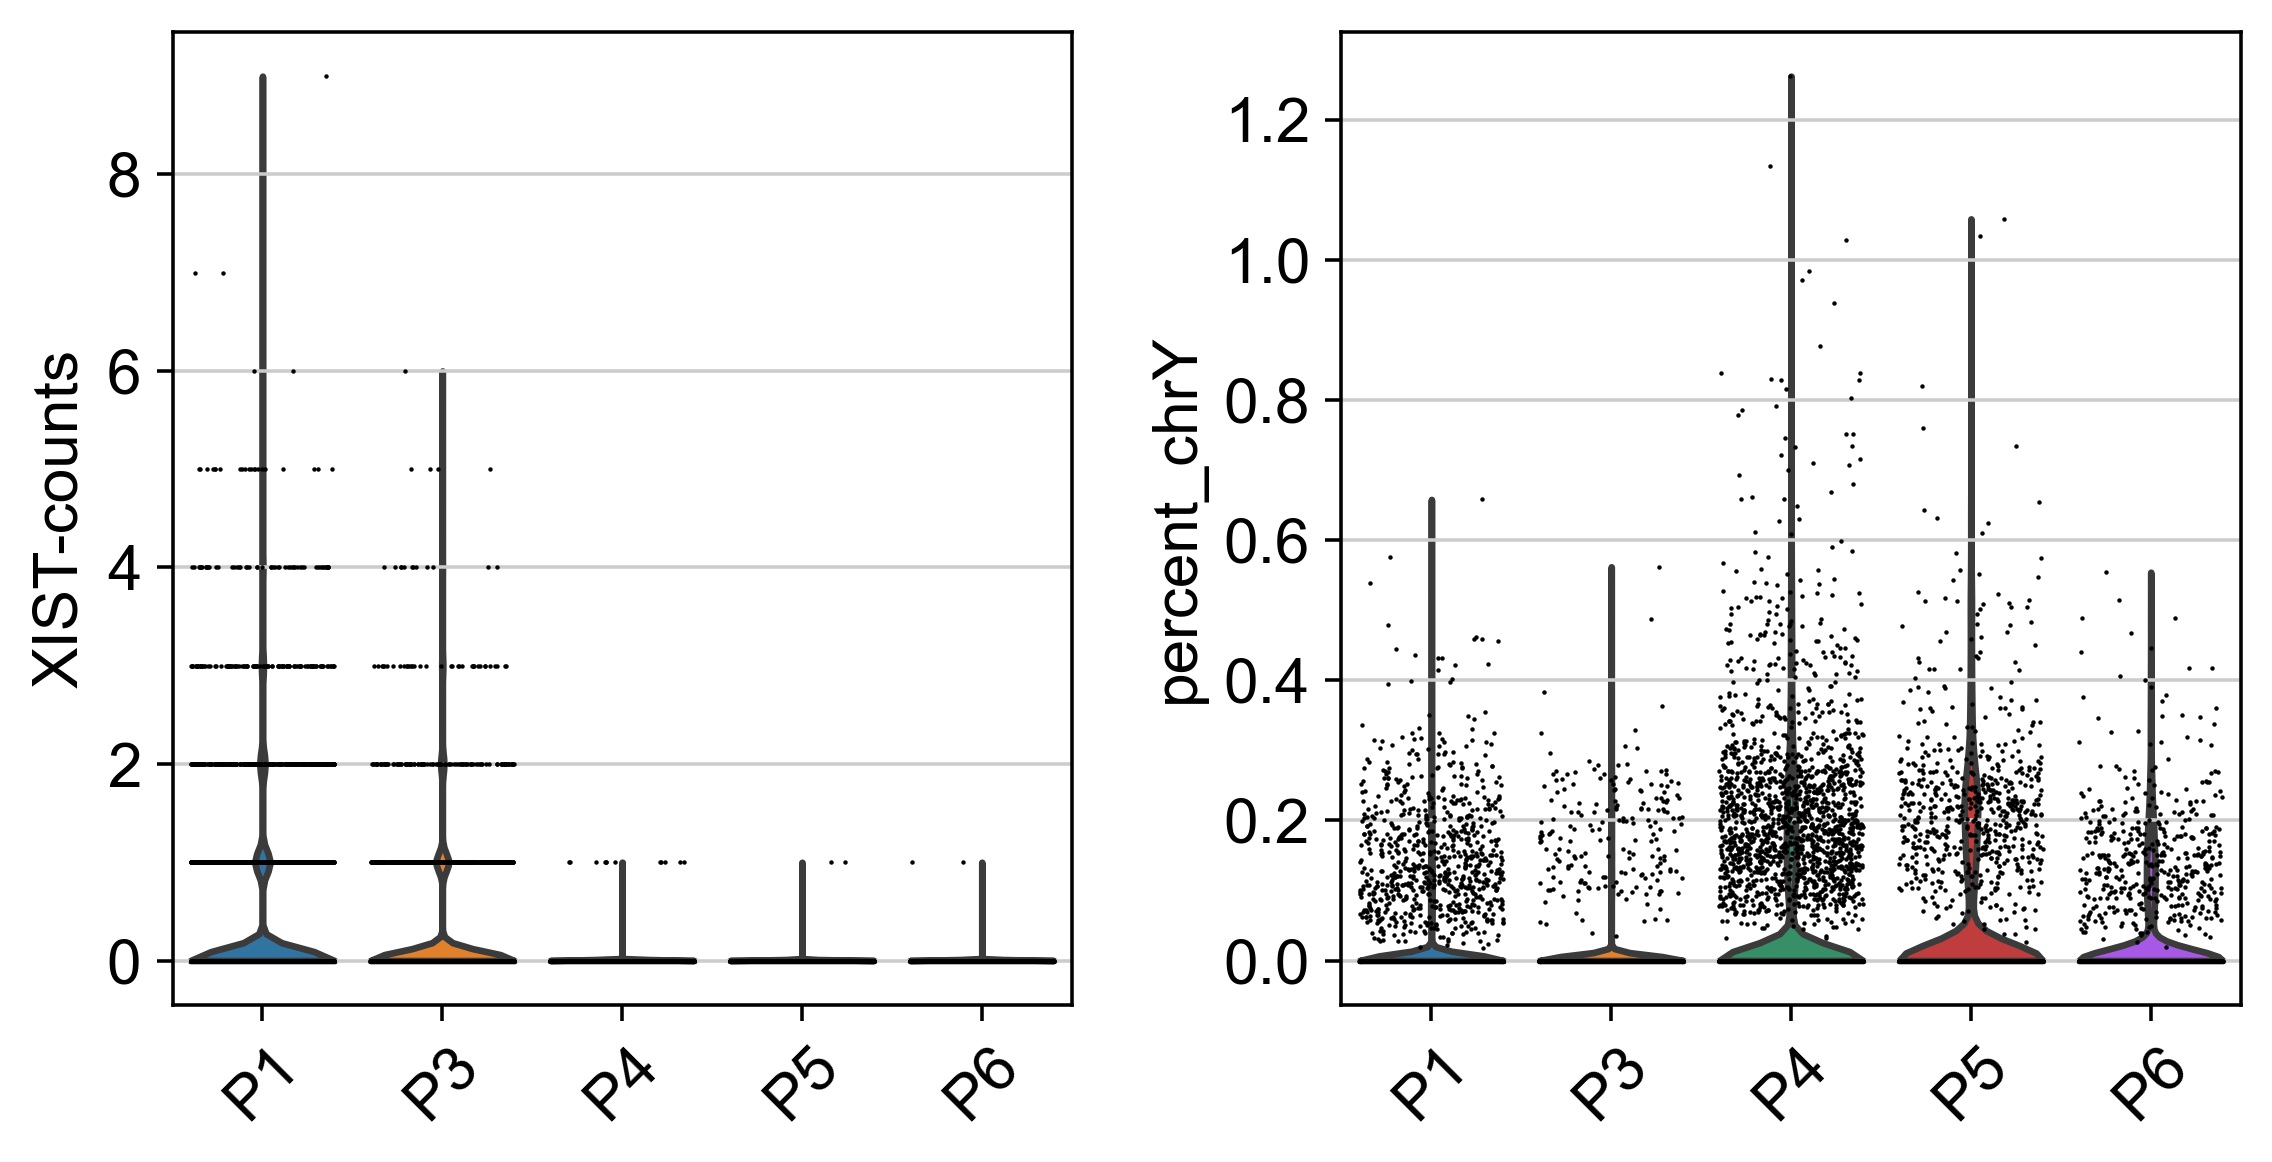

In [37]:
sample_object.obs["XIST-counts"] = sample_object.X[:,sample_object.var_names.str.match('XIST')].toarray()

sc.pl.violin(sample_object, ["XIST-counts", "percent_chrY"], jitter = 0.4, groupby = 'donor', rotation = 45)

### Calculate cell cycle scores

In [38]:
!if [ ! -f /Users/mairi.mcclean/cell_cycle_gene.txt ]; then curl -o /Users/mairi.mcclean/cell_cycle_gene.txt https://raw.githubusercontent.com/theislab/scanpy_usage/master/180209_cell_cycle/data/regev_lab_cell_cycle_genes.txt; fi

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   556  100   556    0     0   1962      0 --:--:-- --:--:-- --:--:--  2029


In [39]:
cell_cycle_genes = [x.strip() for x in open('/Users/mairi.mcclean/data/qc_files/cell_cycle_gene.txt')]
print(len(cell_cycle_genes))

# Split into 2 lists
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]

cell_cycle_genes = [x for x in cell_cycle_genes if x in sample_object.var_names]
print(len(cell_cycle_genes))

97
94


- Create basic `anndata` for score calculation

In [40]:
adata_log = anndata.AnnData(X = sample_object.X,  var = sample_object.var, obs = sample_object.obs)
sc.pp.normalize_total(adata_log, target_sum = 1e6, exclude_highly_expressed = True)
sc.pp.log1p(adata_log)

normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
['ENSG00000288934', 'IGKV4-1', 'IGKV3-11', 'IGKV3-15', 'IGKV3-20', 'ENSG00000286848', 'ENSG00000248223', 'CD74', 'ENSG00000230521', 'ENSG00000227766', 'ENSG00000271581', 'ACTB', 'ENSG00000243004', 'ENSG00000203396', 'VIM-AS1', 'HBB', 'BEST1', 'MALAT1', 'ENSG00000257764', 'BTG1-DT', 'TPT1', 'ENSG00000273149', 'IGHG2', 'IGHA1', 'IGHG1', 'IGHG3', 'IGHM', 'ENO3', 'ENSG00000266865', 'JSRP1', 'ENSG00000267598', 'ENSG00000283907', 'BCAS4', 'PRAMENP', 'IGLV3-25', 'IGLV3-19', 'ENSG00000225840', 'MT-RNR1', 'MT-RNR2', 'MT-CO1', 'MT-CO2', 'MT-CYB']
    finished (0:00:00)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    387 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    514 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


/Users/mairi.mcclean/mambaforge/envs/scanpy_local/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/mairi.mcclean/mambaforge/envs/scanpy_local/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


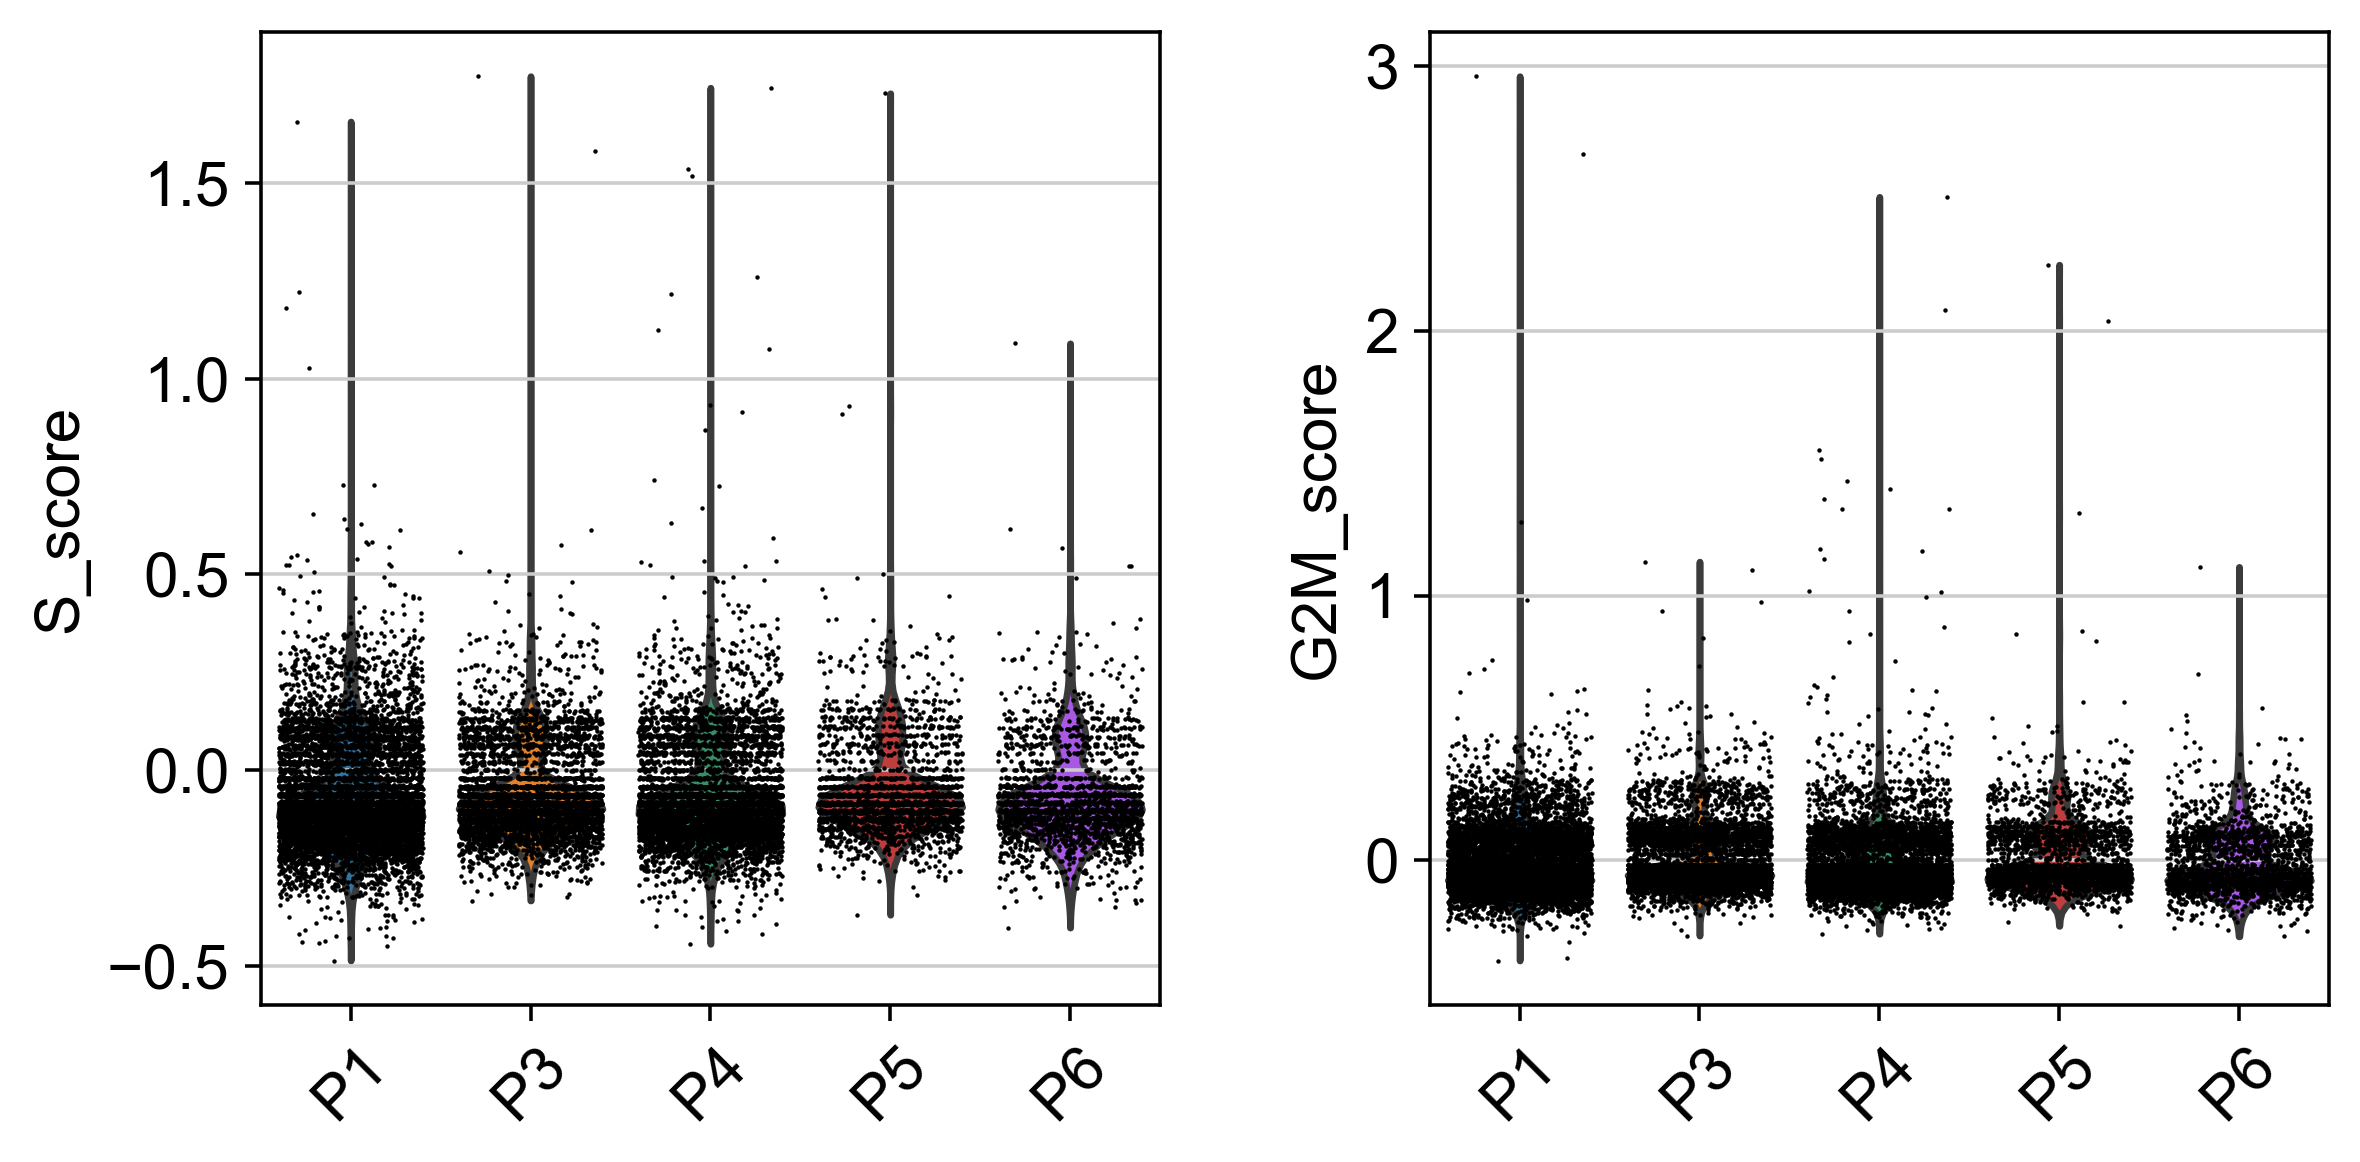

In [41]:
sc.tl.score_genes_cell_cycle(adata_log, s_genes = s_genes, g2m_genes = g2m_genes)
sc.pl.violin(adata_log, ['S_score', 'G2M_score'],
             jitter = 0.4, groupby = 'donor', rotation = 45)

In [42]:
sample_object.obs['S_score'] = adata_log.obs['S_score']
sample_object.obs['G2M_score'] = adata_log.obs['G2M_score']
sample_object

AnnData object with n_obs × n_vars = 25417 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'data_type', 'centre', 'version', 'object', 'protocol', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score'
    var: 'gene_id', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'donor_colors'

### Predict doublets

In [43]:
holder = np.zeros((sample_object.shape[0],))
for smp in np.unique(sample_object.obs['sample']):
    if smp == []:
        continue
    adata_smp = sample_object[sample_object.obs['sample'] == smp]
    scrub = scr.Scrublet(adata_smp.X)
    adata_smp.obs['doublet_scores'], adata_smp.obs['predicted_doublets'] = scrub.scrub_doublets()
    holder[sample_object.obs['sample'] == smp] = adata_smp.obs['predicted_doublets']
sample_object.obs['predicted_doublets'] = holder

sum(sample_object.obs['predicted_doublets'])
sample_object

Preprocessing...
Simulating doublets...


/Users/mairi.mcclean/mambaforge/envs/scanpy_local/lib/python3.9/site-packages/scrublet/helper_functions.py:239: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])
/Users/mairi.mcclean/mambaforge/envs/scanpy_local/lib/python3.9/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.35
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.0%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 0.0%
Elapsed time: 6.2 seconds
Preprocessing...
Simulating doublets...


/var/folders/g6/vfgrx_y95ml0h2lsgfx4jg6jwvdsz3/T/ipykernel_19799/627552001.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_smp.obs['doublet_scores'], adata_smp.obs['predicted_doublets'] = scrub.scrub_doublets()
/Users/mairi.mcclean/mambaforge/envs/scanpy_local/lib/python3.9/site-packages/scrublet/helper_functions.py:239: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])
/Users/mairi.mcclean/mambaforge/envs/scanpy_local/lib/python3.9/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.04
Detected doublet rate = 90.2%
Estimated detectable doublet fraction = 94.6%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 95.4%
Elapsed time: 2.7 seconds
Preprocessing...
Simulating doublets...


/var/folders/g6/vfgrx_y95ml0h2lsgfx4jg6jwvdsz3/T/ipykernel_19799/627552001.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_smp.obs['doublet_scores'], adata_smp.obs['predicted_doublets'] = scrub.scrub_doublets()
/Users/mairi.mcclean/mambaforge/envs/scanpy_local/lib/python3.9/site-packages/scrublet/helper_functions.py:239: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])
/Users/mairi.mcclean/mambaforge/envs/scanpy_local/lib/python3.9/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.32
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.1%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 0.0%
Elapsed time: 4.3 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...


/var/folders/g6/vfgrx_y95ml0h2lsgfx4jg6jwvdsz3/T/ipykernel_19799/627552001.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_smp.obs['doublet_scores'], adata_smp.obs['predicted_doublets'] = scrub.scrub_doublets()
/Users/mairi.mcclean/mambaforge/envs/scanpy_local/lib/python3.9/site-packages/scrublet/helper_functions.py:239: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])
/Users/mairi.mcclean/mambaforge/envs/scanpy_local/lib/python3.9/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Calculating doublet scores...
Automatically set threshold at doublet score = 0.26
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 0.4%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 42.1%
Elapsed time: 1.0 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...


/var/folders/g6/vfgrx_y95ml0h2lsgfx4jg6jwvdsz3/T/ipykernel_19799/627552001.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_smp.obs['doublet_scores'], adata_smp.obs['predicted_doublets'] = scrub.scrub_doublets()
/Users/mairi.mcclean/mambaforge/envs/scanpy_local/lib/python3.9/site-packages/scrublet/helper_functions.py:239: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])
/Users/mairi.mcclean/mambaforge/envs/scanpy_local/lib/python3.9/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Calculating doublet scores...
Automatically set threshold at doublet score = 0.63
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.0%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 0.0%
Elapsed time: 1.0 seconds


/var/folders/g6/vfgrx_y95ml0h2lsgfx4jg6jwvdsz3/T/ipykernel_19799/627552001.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_smp.obs['doublet_scores'], adata_smp.obs['predicted_doublets'] = scrub.scrub_doublets()


AnnData object with n_obs × n_vars = 25417 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'data_type', 'centre', 'version', 'object', 'protocol', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'predicted_doublets'
    var: 'gene_id', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'donor_colors'

(<Figure size 1280x480 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <AxesSubplot:title={'center':'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

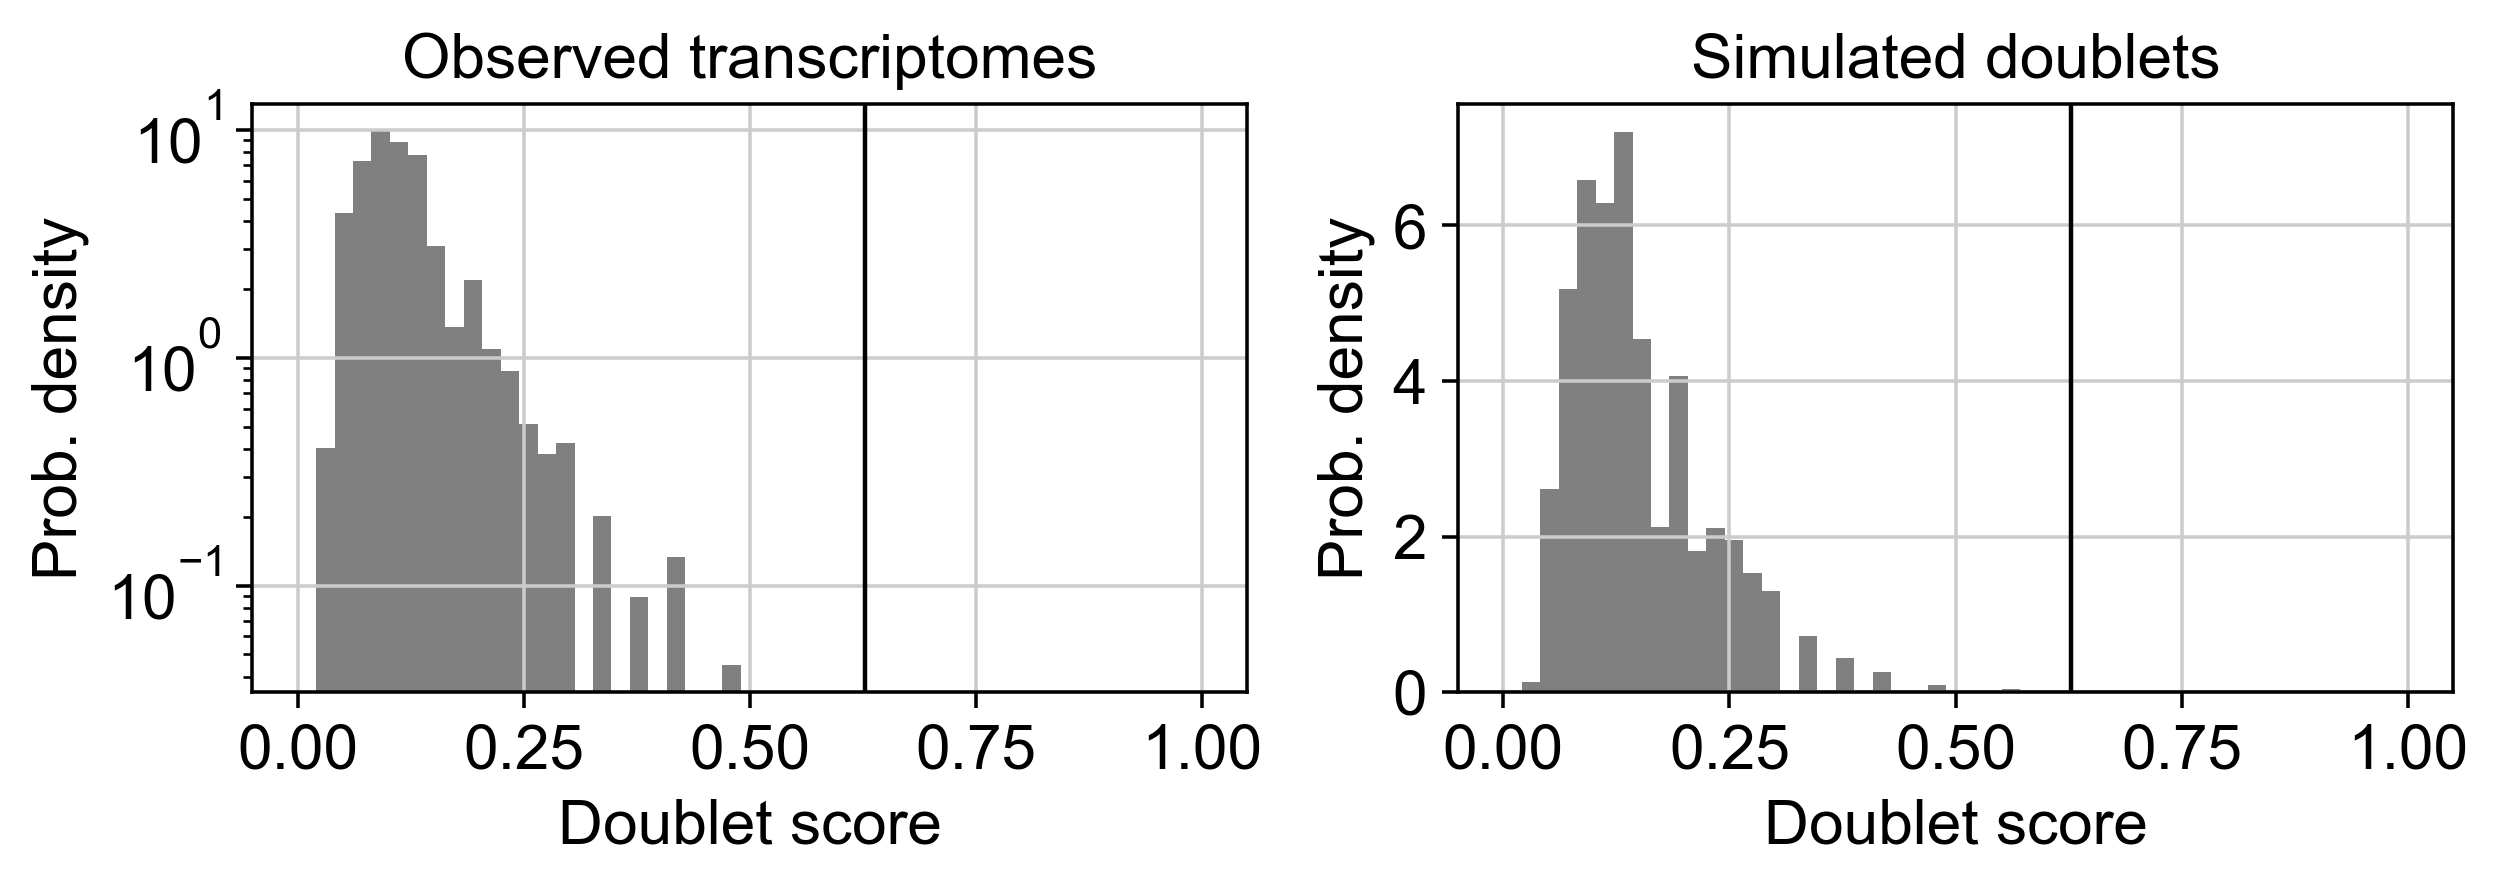

In [44]:
scrub.plot_histogram()

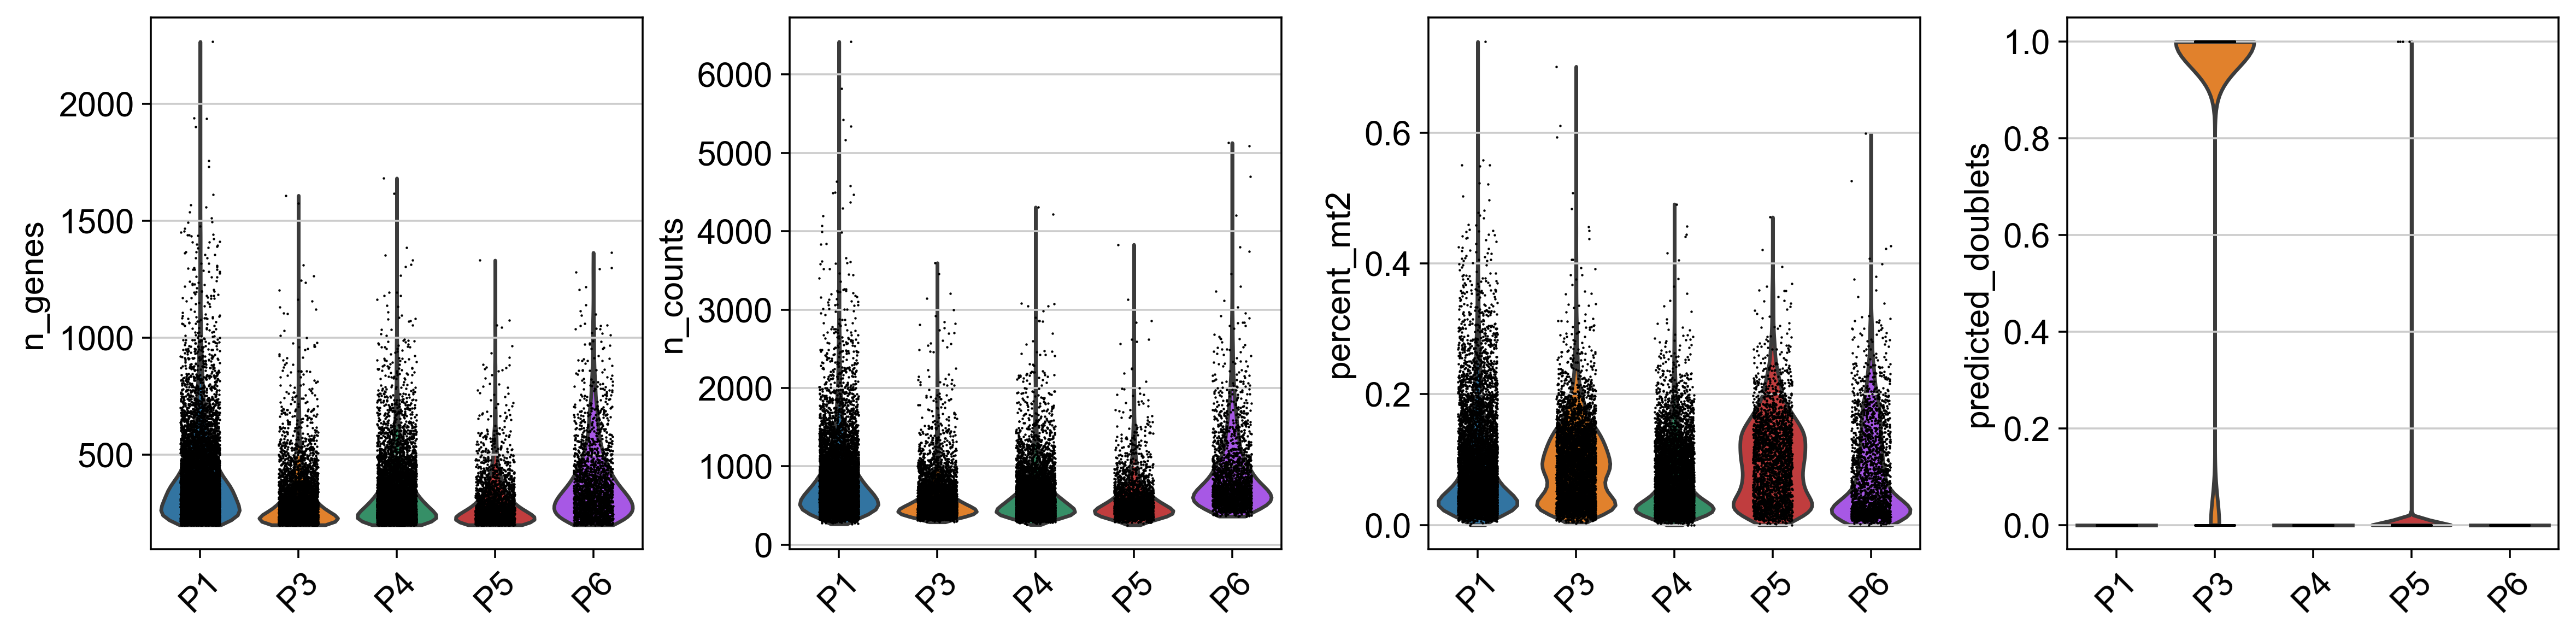

In [45]:
#check if our predicted doublets also have more detected genes in general

sc.pl.violin(sample_object, ['n_genes', 'n_counts', 'percent_mt2', 'predicted_doublets'],
             jitter = 0.2, groupby = 'donor', rotation = 45)

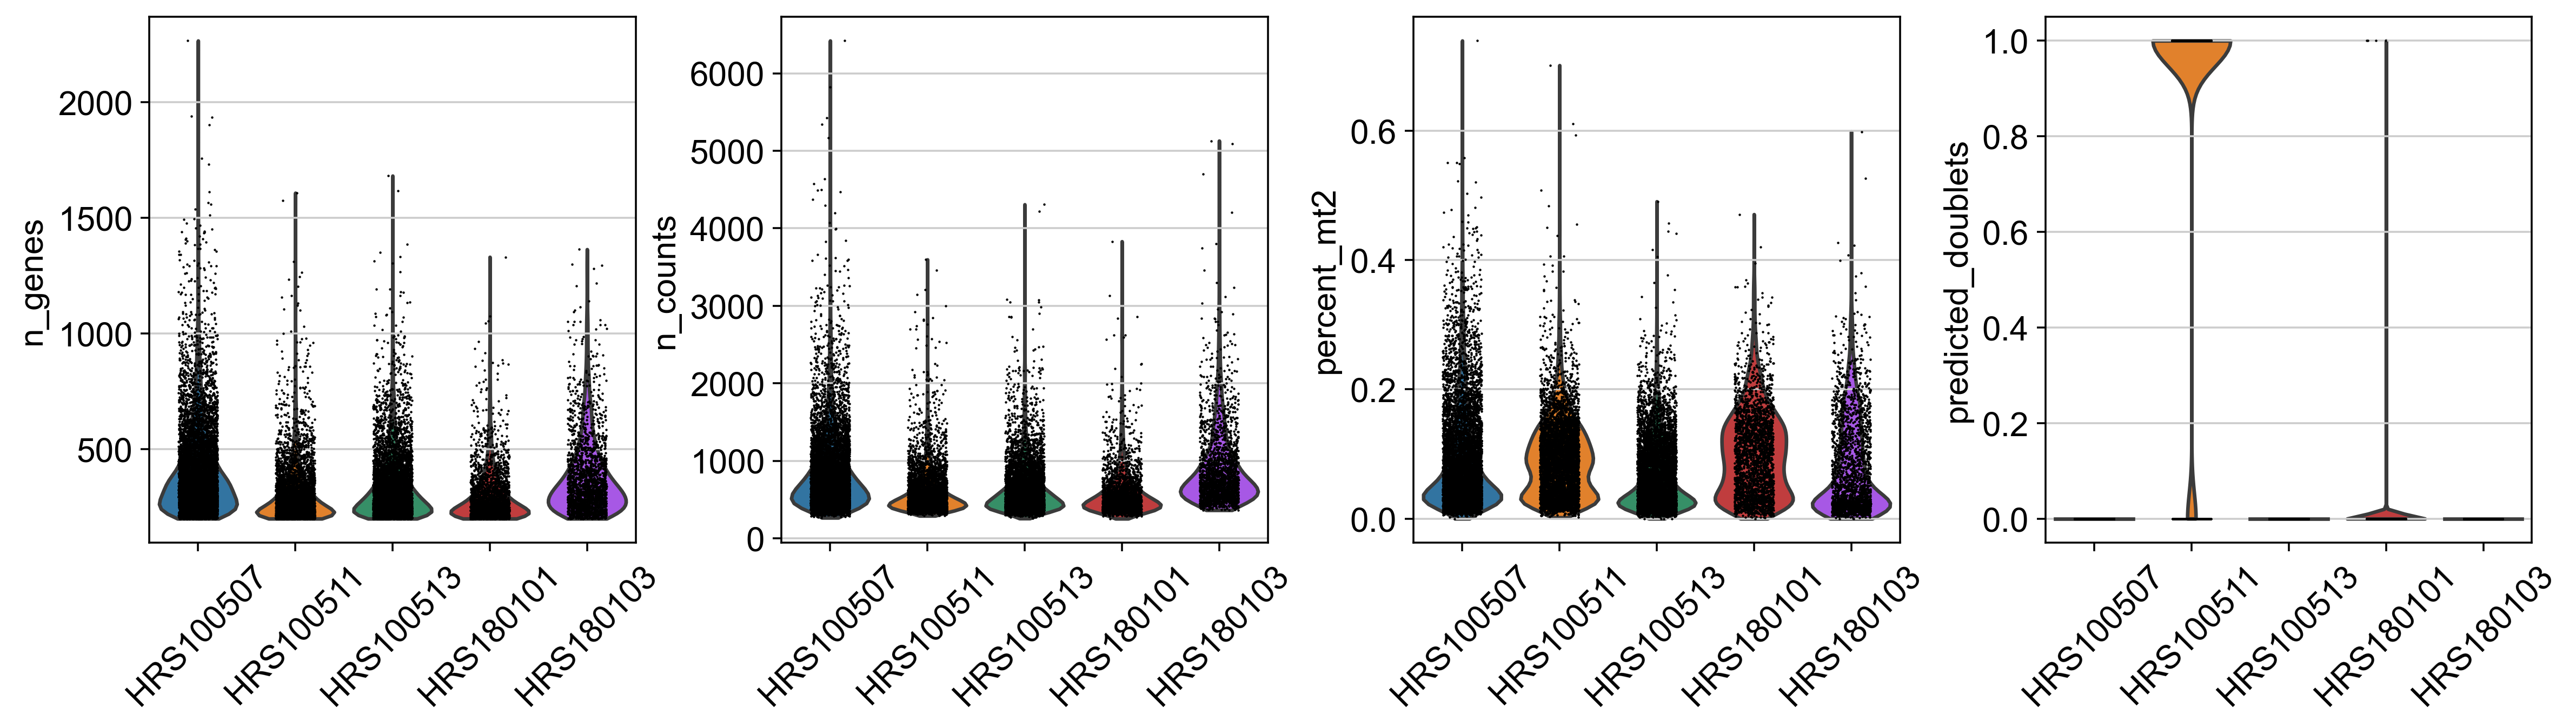

In [46]:
sc.pl.violin(sample_object, ['n_genes', 'n_counts', 'percent_mt2', 'predicted_doublets'],
             jitter = 0.2, groupby = 'sample', rotation = 45)

### Density plots

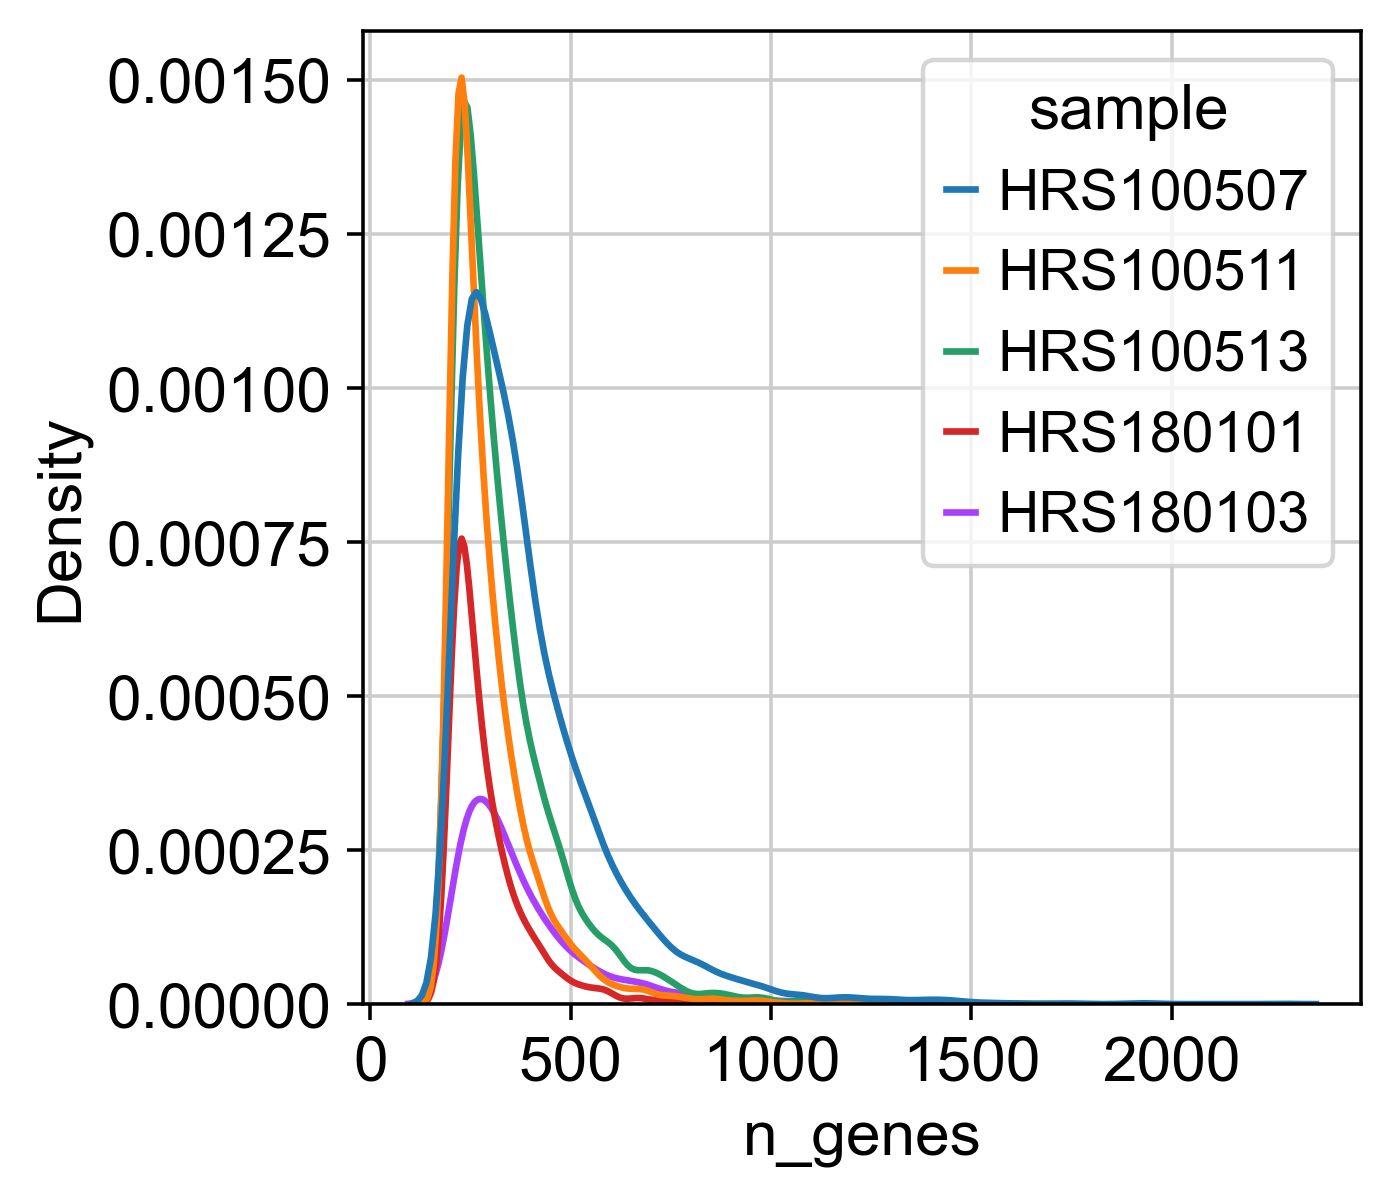

In [47]:
fig = sb.kdeplot(data=sample_object.obs, x=sample_object.obs['n_genes'], hue="sample", log_scale=False)
plt.show()

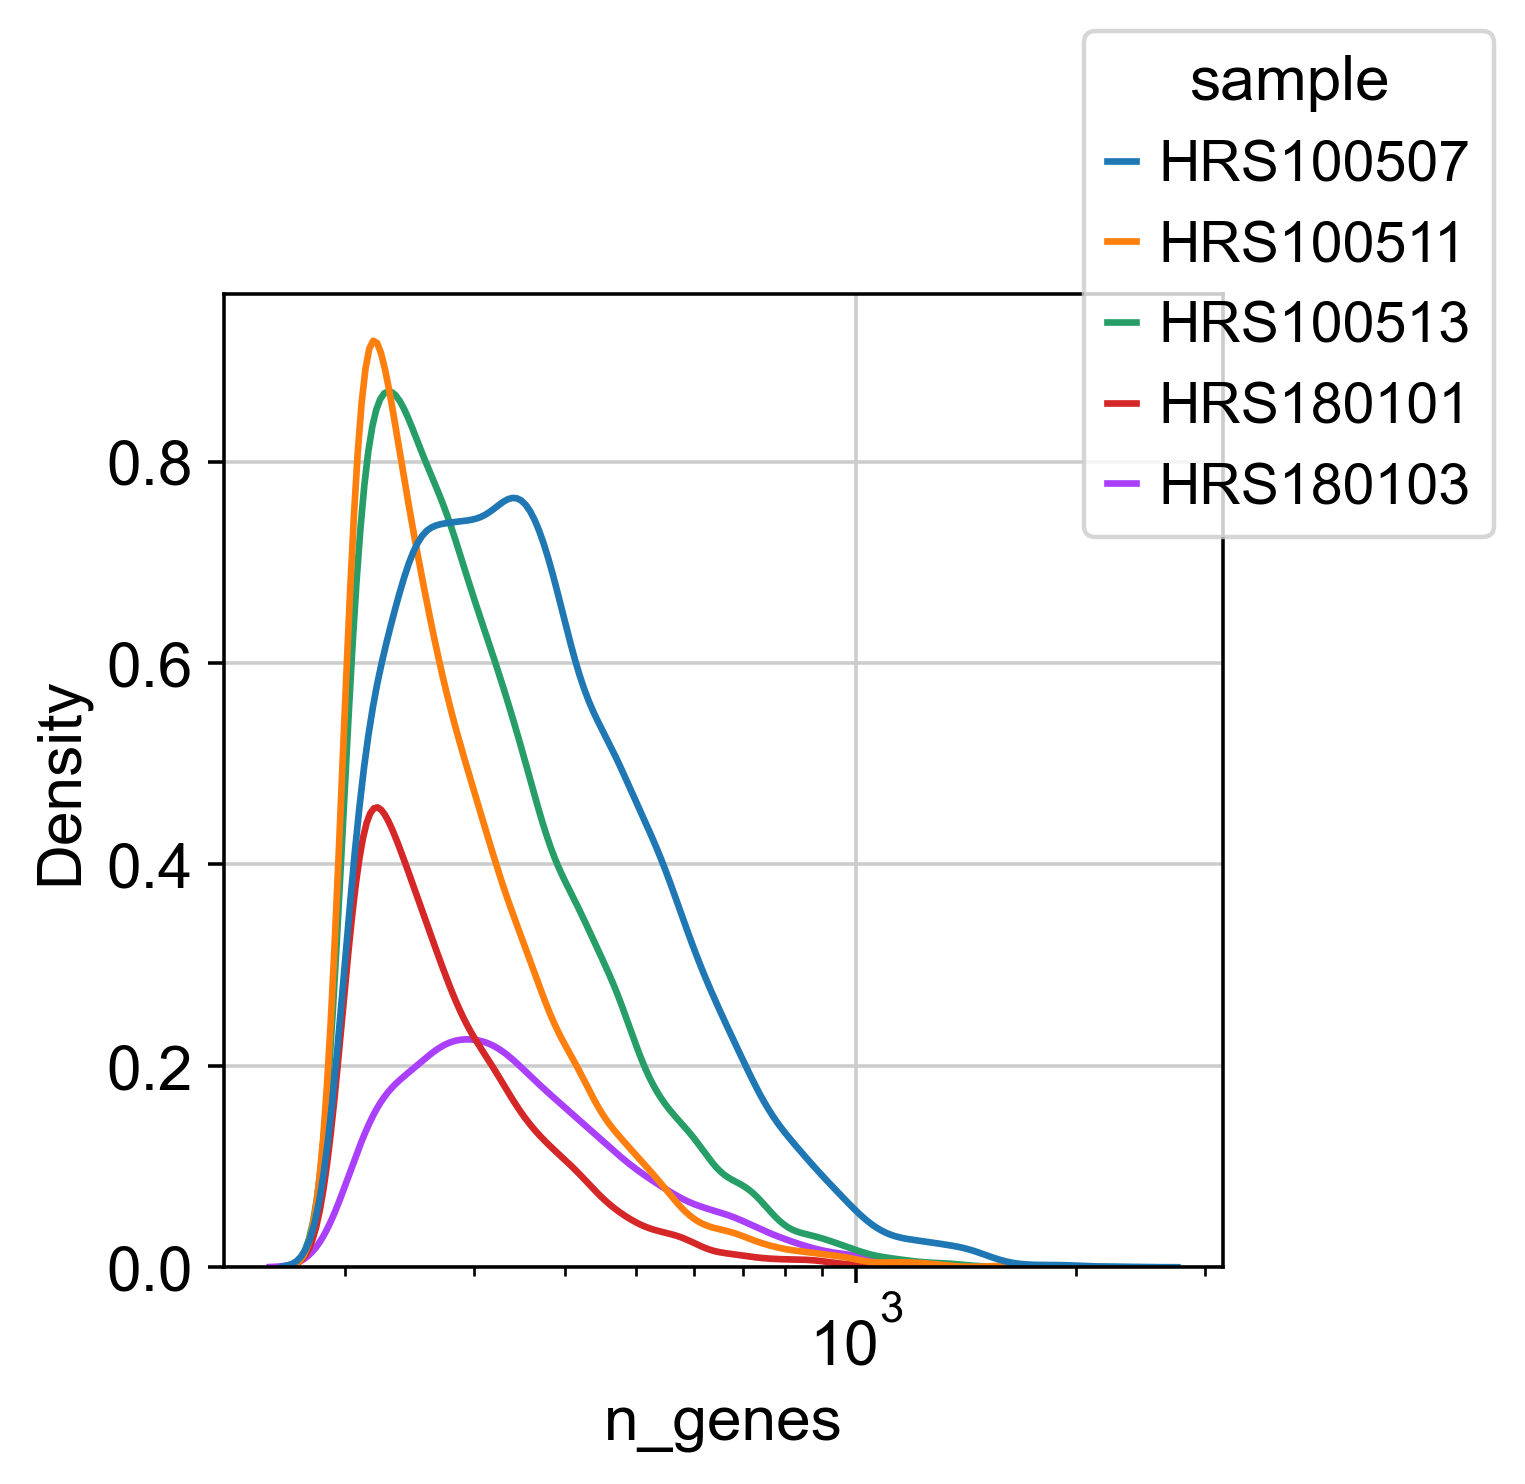

In [48]:
fig_n_genes = sb.kdeplot(data=sample_object.obs, x=sample_object.obs['n_genes'], hue="sample", log_scale=True)
sb.move_legend(fig_n_genes, "upper right", bbox_to_anchor=(1.3, 1.3))
plt.show()

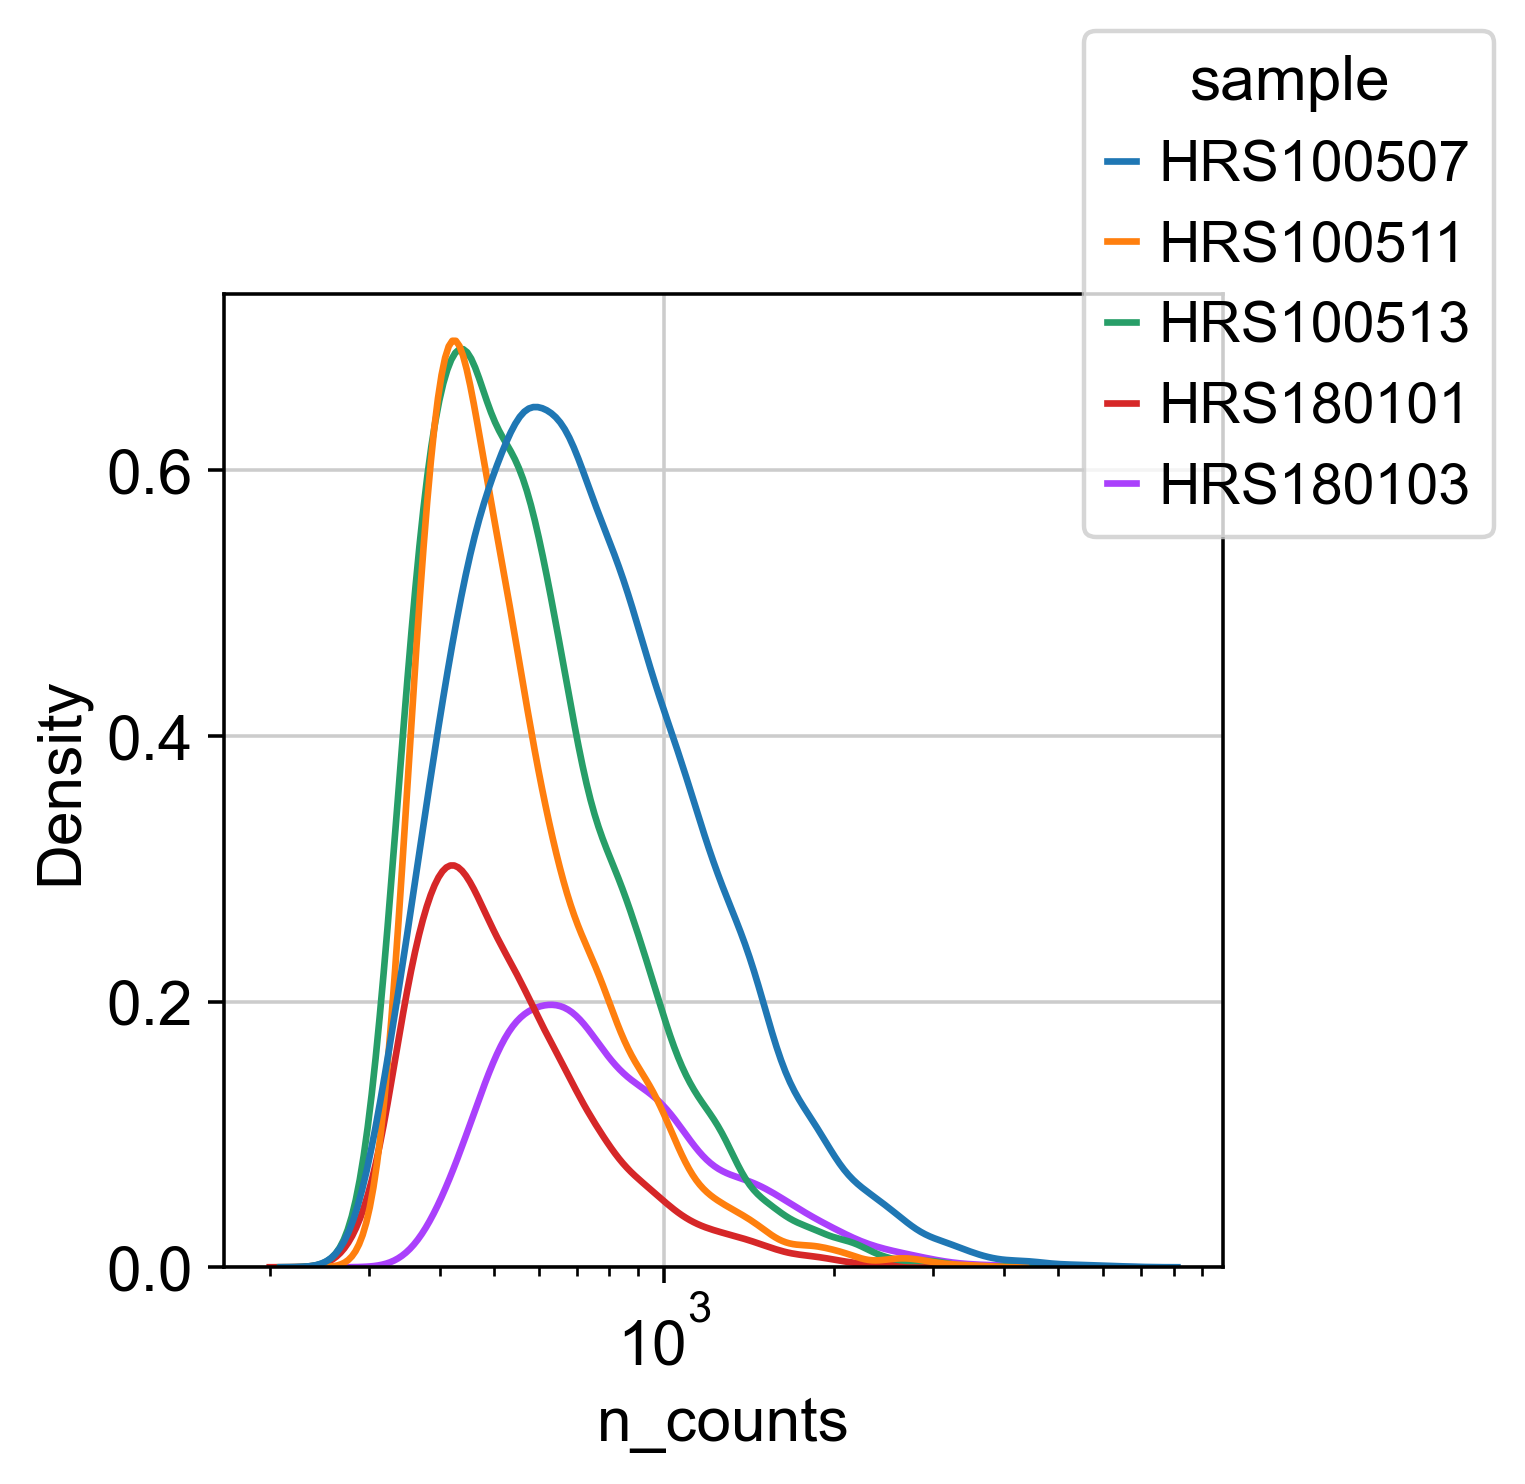

In [49]:
fig_n_counts = sb.kdeplot(data=sample_object.obs, x=sample_object.obs['n_counts'], hue="sample", log_scale=True)
sb.move_legend(fig_n_counts, "upper right", bbox_to_anchor=(1.3, 1.3))
plt.show()

/var/folders/g6/vfgrx_y95ml0h2lsgfx4jg6jwvdsz3/T/ipykernel_19799/2282069559.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sb.kdeplot(data=sample_object.obs, x=sample_object.obs['predicted_doublets'], hue="sample")
/var/folders/g6/vfgrx_y95ml0h2lsgfx4jg6jwvdsz3/T/ipykernel_19799/2282069559.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sb.kdeplot(data=sample_object.obs, x=sample_object.obs['predicted_doublets'], hue="sample")
/var/folders/g6/vfgrx_y95ml0h2lsgfx4jg6jwvdsz3/T/ipykernel_19799/2282069559.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sb.kdeplot(data=sample_object.obs, x=sample_object.obs['predicted_doublets'], hue="sample")


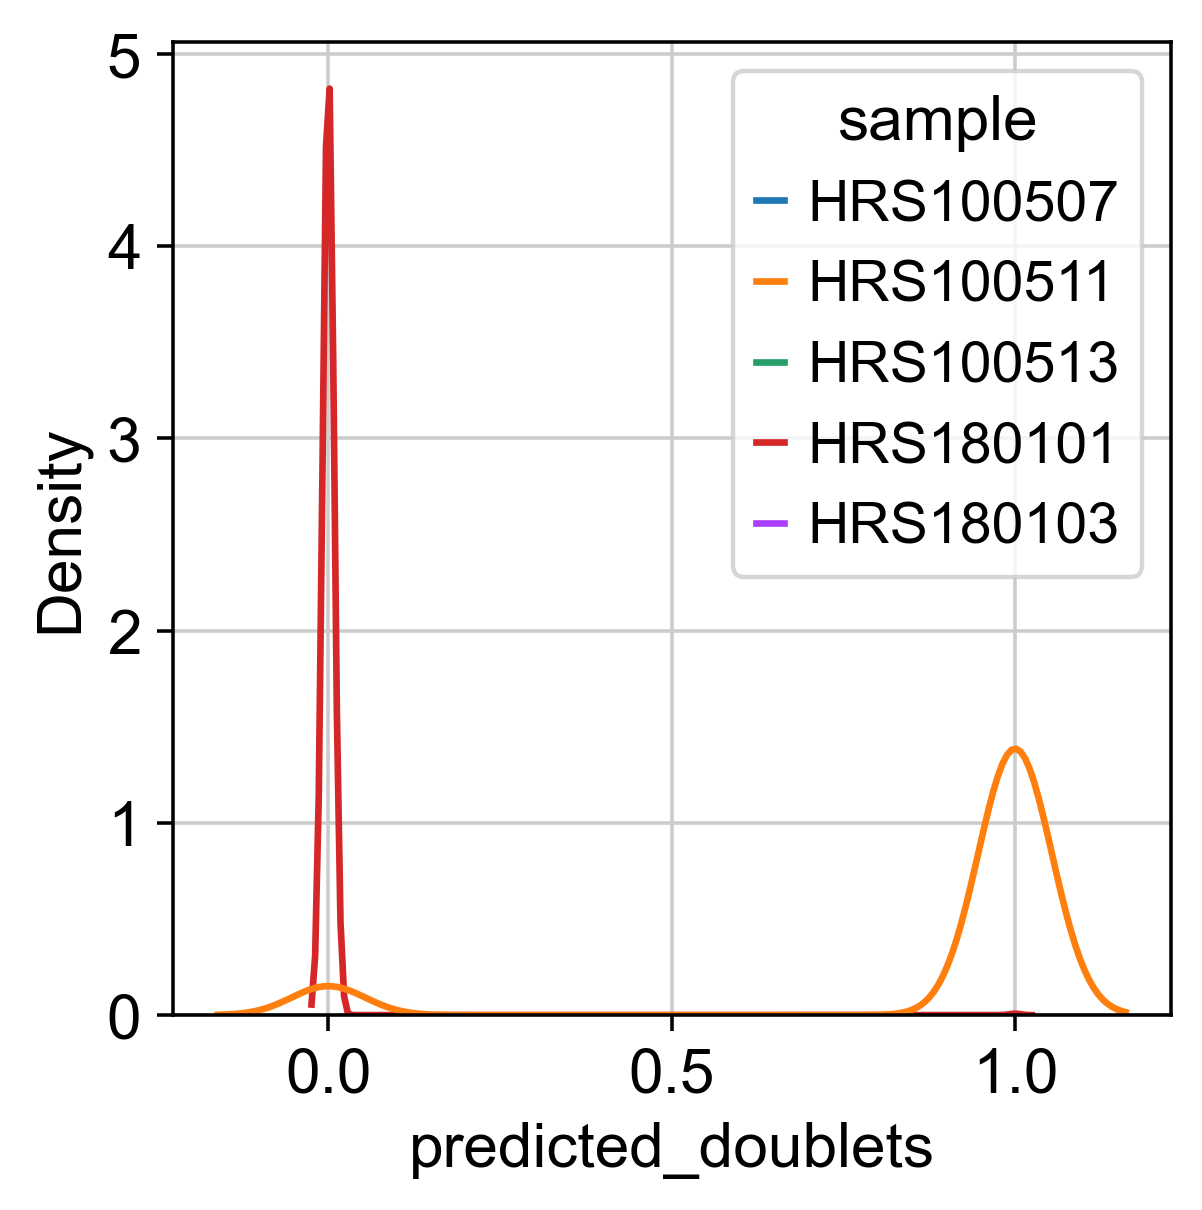

In [50]:
sb.kdeplot(data=sample_object.obs, x=sample_object.obs['predicted_doublets'], hue="sample")
plt.show()

### Prepare counts for individual slots


In [51]:
sample_object.raw = sample_object.copy()
sample_object.layers['counts'] = sample_object.X.copy()
sample_object.layers["sqrt_norm"] = np.sqrt(
    sc.pp.normalize_total(sample_object, inplace = False)["X"]
)
sample_object

normalizing counts per cell
    finished (0:00:00)


AnnData object with n_obs × n_vars = 25417 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'data_type', 'centre', 'version', 'object', 'protocol', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'predicted_doublets'
    var: 'gene_id', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'donor_colors', 'sample_colors'
    layers: 'counts', 'sqrt_norm'

### Export object

In [52]:
# sample_object.write('/lustre/groups/talaveralopez/datasets/tuberculosis/rna-seq/mairi_data_lake/processed_files/abridged_qc/human/Cai2022_scRNA_PBMC_mm230314_qcd.h5ad')


In [53]:
sample_object.write('/Users/mairi.mcclean/data/abridged_qc/human/Cai2022_scRNA_PBMC_mm230315_qcd.h5ad')
                    